number of faces in image( 1 ) :  6
number of faces in image( 2 ) :  1
end of program


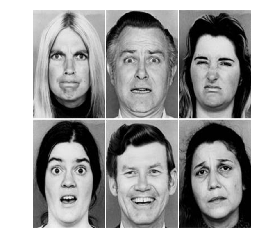

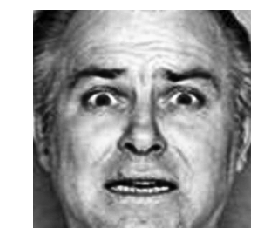

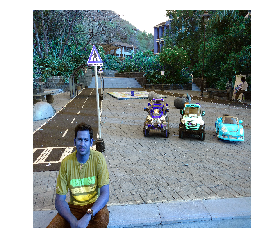

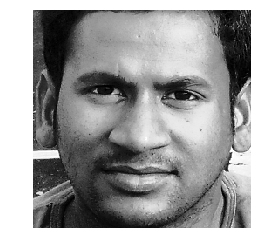

In [16]:
import cv2
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

number = 0

def format_image(image):
    global number
    number += 1
    initial_image = cv2.resize(image, (750, 750), interpolation=cv2.INTER_CUBIC) / 255.
    plt.figure()
    plt.axis('off')
    plt.imshow(initial_image, cmap = 'gray')
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        image = clahe.apply(image)
    else:
        image = cv2.imdecode(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
    faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(
        image,
        scaleFactor=1.3,
        minNeighbors=5
    )
    
    print("number of faces in image(",number,") : ",len(faces))
    if not len(faces) > 0:
        return None
    max_area_face = faces[0]
    for face in faces:
        if face[2] * face[3] > max_area_face[2] * max_area_face[3]:
            max_area_face = face
    # Chop image to face
    face = max_area_face
    image = image[face[1]:(face[1] + face[2]), face[0]:(face[0] + face[3])]
    # Resize image to network size
    try:
        image = cv2.resize(image, (250, 250), interpolation=cv2.INTER_CUBIC) / 255.
        plt.figure()
        plt.axis('off')
        plt.imshow(image, cmap = 'gray')
    except Exception:
        print("[+] Problem during resize")
        return None


files = []

for f in os.listdir("./"):
    ext = os.path.splitext(f)[1]
    if ext.lower() in [".jpg"]:
        files.append(f)
        
for f in files:
    frame = cv2.imread(f)
    format_image(frame)

print("end of program")